## import nesseray libraries 

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


## Reading dataset

In [2]:
sales=pd.read_csv("walmartsales.csv")

## Data preprocessing

In [181]:
sales['Date']=pd.to_datetime(sales['Date'])

## Feature engineering

In [182]:
sales['monthdate']=sales['Date'].dt.month
sales['yeardate']=sales['Date'].dt.year

0        2
1        2
2        2
3        2
4        3
        ..
6430     9
6431    10
6432    10
6433    10
6434    10
Name: monthdate, Length: 6435, dtype: int32


## EDA on data

In [3]:
sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
sales.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
sales.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [12]:
sales.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

## Finding correlation between features 

In [13]:
numeric_data = sales.select_dtypes(include='number')

numeric_data.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.735625e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.735625e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


In [106]:
numeric_data = sales.select_dtypes(include='number')

numeric_data.corr()['Weekly_Sales'].sort_values(ascending=False)

Weekly_Sales    1.000000
monthdate       0.076143
Holiday_Flag    0.036891
Fuel_Price      0.009464
yeardate       -0.018378
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Store          -0.335332
Name: Weekly_Sales, dtype: float64

## Data visualization

<Axes: >

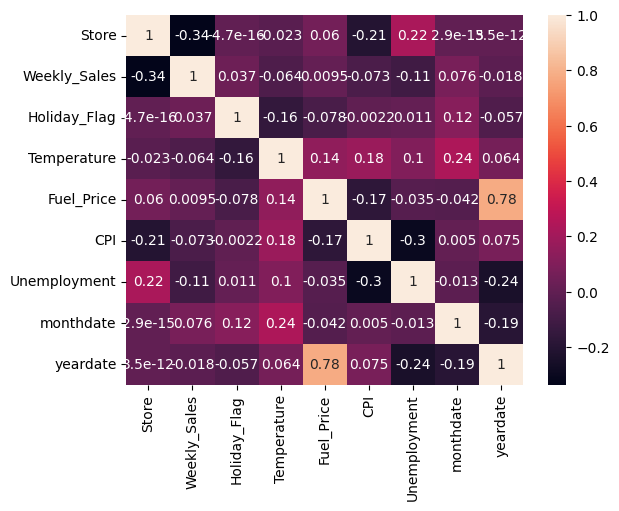

In [220]:
sns.heatmap(numeric_data.corr(), annot=True)

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Weekly_Sales'}>],
       [<Axes: title={'center': 'Holiday_Flag'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Fuel_Price'}>],
       [<Axes: title={'center': 'CPI'}>,
        <Axes: title={'center': 'Unemployment'}>,
        <Axes: title={'center': 'monthdate'}>],
       [<Axes: title={'center': 'yeardate'}>, <Axes: >, <Axes: >]],
      dtype=object)

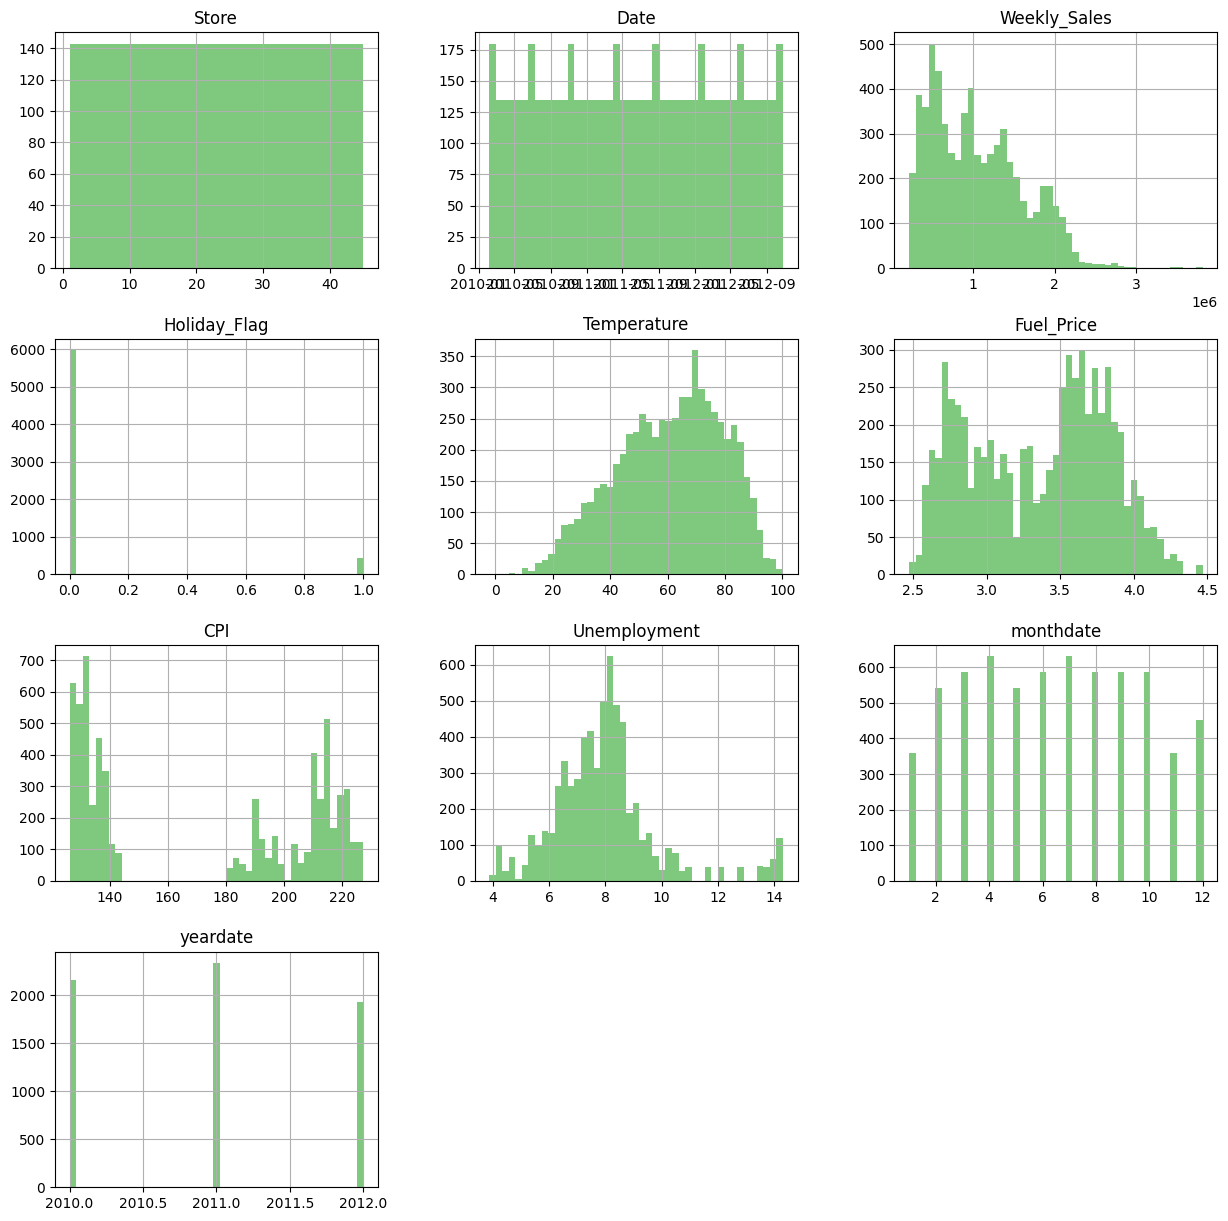

In [219]:
sales.hist(figsize=(15,15),bins=45)

#### A. Which store has maximum sales?

In [61]:
maxstore = sales.groupby(['Store'])['Weekly_Sales'].sum().round().sort_values(ascending=False)
maxstore

Store
20    301397792.0
4     299543953.0
14    288999911.0
13    286517704.0
2     275382441.0
10    271617714.0
27    253855917.0
6     223756131.0
1     222402809.0
39    207445542.0
19    206634862.0
31    199613906.0
23    198750618.0
24    194016021.0
11    193962787.0
28    189263681.0
41    181341935.0
32    166819246.0
18    155114734.0
22    147075649.0
12    144287230.0
26    143416394.0
34    138249763.0
40    137870310.0
35    131520672.0
8     129951181.0
17    127782139.0
45    112395341.0
21    108117879.0
25    101061179.0
43     90565435.0
15     89133684.0
7      81598275.0
42     79565752.0
9      77789219.0
29     77141554.0
16     74252425.0
37     74202740.0
30     62716885.0
3      57586735.0
38     55159626.0
36     53412215.0
5      45475689.0
44     43293088.0
33     37160222.0
Name: Weekly_Sales, dtype: float64

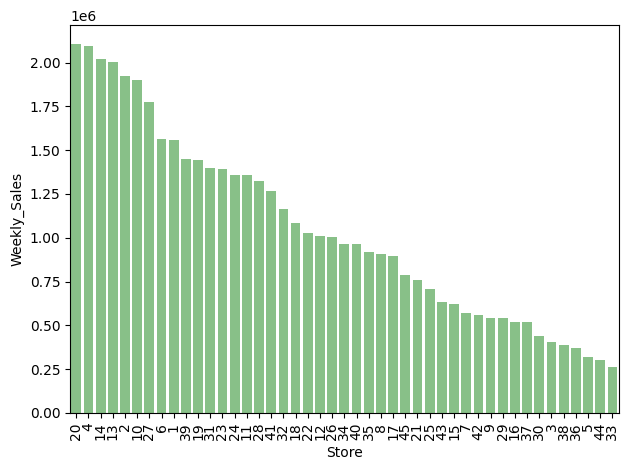

In [218]:
avg_sales_by_store = sales.groupby('Store')['Weekly_Sales'].mean().reset_index()
sns.barplot(data=avg_sales_by_store, x='Store', y='Weekly_Sales',order = avg_sales_by_store.sort_values('Weekly_Sales',ascending = False)['Store'])
plt.xticks(rotation=90)  # Rotate X-axis labels by 45 degrees
plt.tight_layout()

#### B.Which store has maximum standard deviation i.e., the sales vary a lot

In [67]:
maxstd = sales.groupby(['Store'])['Weekly_Sales'].std().sort_values(ascending=False)
maxstd

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
23    249788.038068
27    239930.135688
2     237683.694682
39    217466.454833
6     212525.855862
35    211243.457791
19    191722.638730
41    187907.162766
28    181758.967539
18    176641.510839
24    167745.677567
11    165833.887863
22    161251.350631
1     155980.767761
12    139166.871880
32    138017.252087
45    130168.526635
21    128752.812853
31    125855.942933
15    120538.652043
40    119002.112858
25    112976.788600
7     112585.469220
17    112162.936087
26    110431.288141
8     106280.829881
34    104630.164676
29     99120.136596
16     85769.680133
9      69028.666585
36     60725.173579
42     50262.925530
3      46319.631557
38     42768.169450
43     40598.413260
5      37737.965745
44     24762.832015
33     24132.927322
30     22809.665590
37     21837.461190
Name: Weekly_Sales, dtype: float64

####  D. Provide a monthly and semester view of sales in units and give insights.

In [186]:
monthly_sales = sales.groupby('monthdate')[['Weekly_Sales']].sum()
print(monthly_sales)
highest_selling_month = monthly_sales.idxmax()
print(highest_selling_month)

           Weekly_Sales
monthdate              
1          3.325984e+08
2          5.687279e+08
3          5.927859e+08
4          6.468598e+08
5          5.571256e+08
6          6.226299e+08
7          6.500010e+08
8          6.130902e+08
9          5.787612e+08
10         5.847848e+08
11         4.130157e+08
12         5.768386e+08
Weekly_Sales    7
dtype: int32


<Axes: xlabel='monthdate', ylabel='Weekly_Sales'>

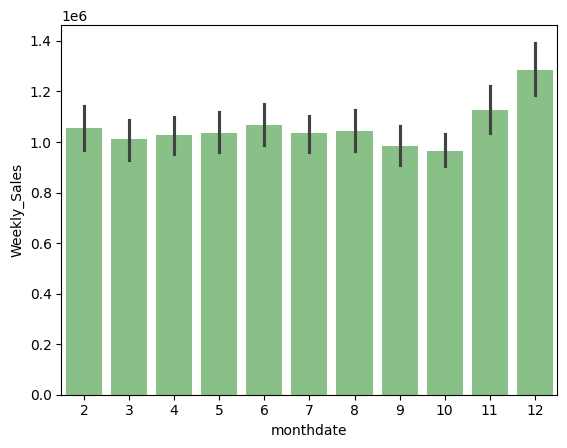

In [217]:
sns.barplot(x=sales[sales.yeardate==2010]['monthdate'],  y=sales[sales.yeardate==2010]['Weekly_Sales'])

<Axes: xlabel='monthdate', ylabel='Weekly_Sales'>

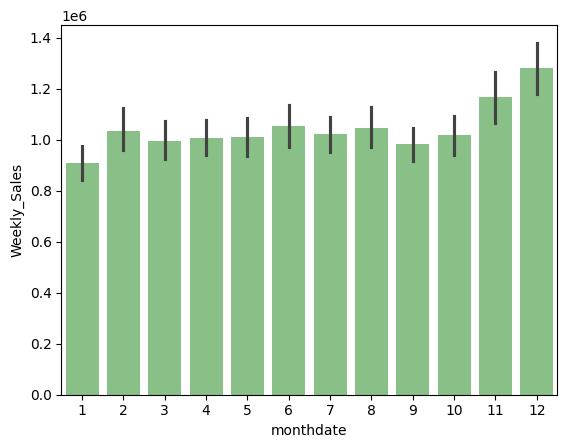

In [216]:
sns.barplot(x=sales[sales.yeardate==2011]['monthdate'],  y=sales[sales.yeardate==2011]['Weekly_Sales'])

<Axes: xlabel='monthdate', ylabel='Weekly_Sales'>

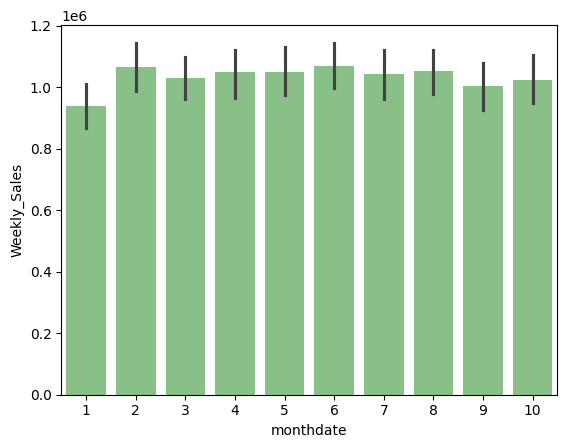

In [211]:
sns.barplot(x=sales[sales.yeardate==2012]['monthdate'],  y=sales[sales.yeardate==2012]['Weekly_Sales'])

In [208]:
semester_sales = sales.groupby('yeardate')['Weekly_Sales'].sum()
print(semester_sales)

yeardate
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64


<Axes: xlabel='yeardate'>

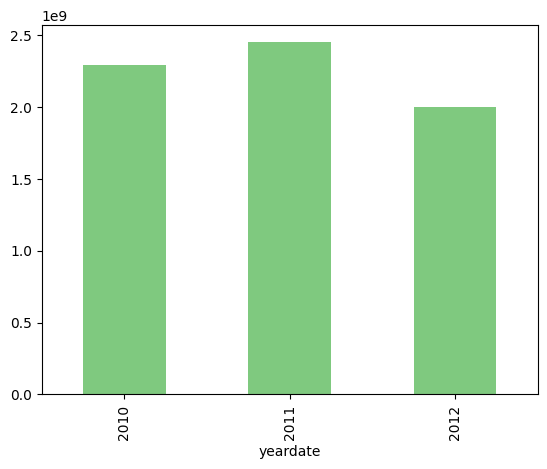

In [212]:
semester_sales.plot(kind='bar', legend=False)

## E. Plot the relations between weekly sales vs. other numeric features and give insights.

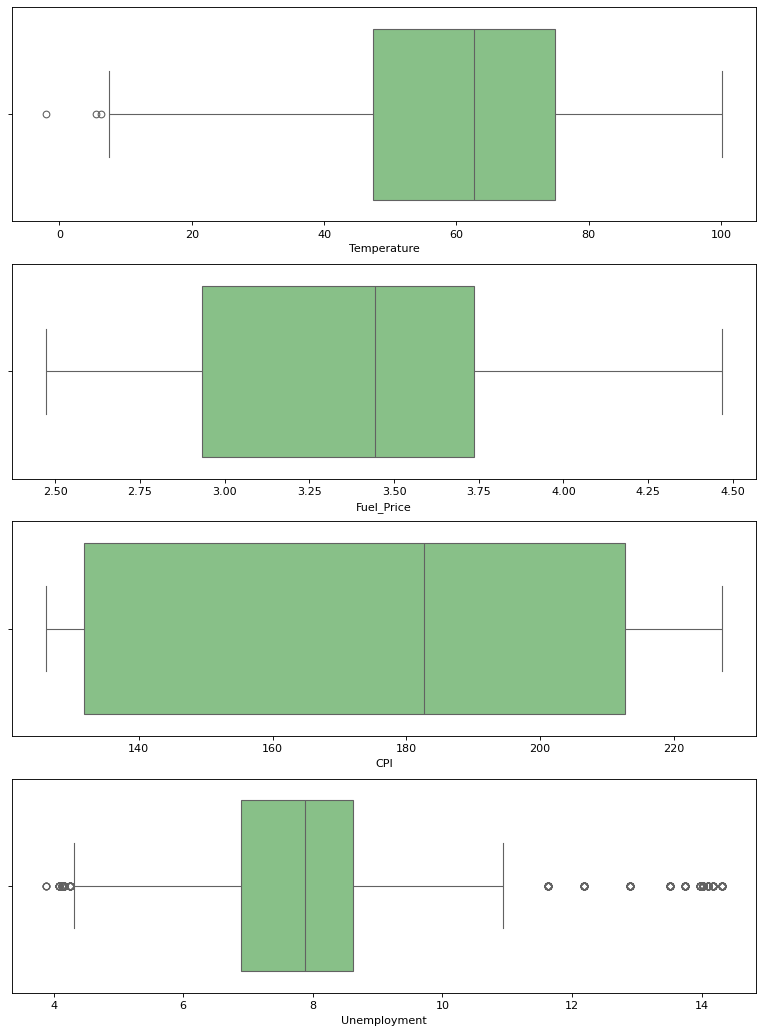

In [213]:
fig, axis = plt.subplots(4, figsize=(12,16), dpi=80)
x = sales[['Temperature','Fuel_Price','CPI','Unemployment']]

for i, column in enumerate(x):
    sns.boxplot(x=sales[column], ax=axis[i])


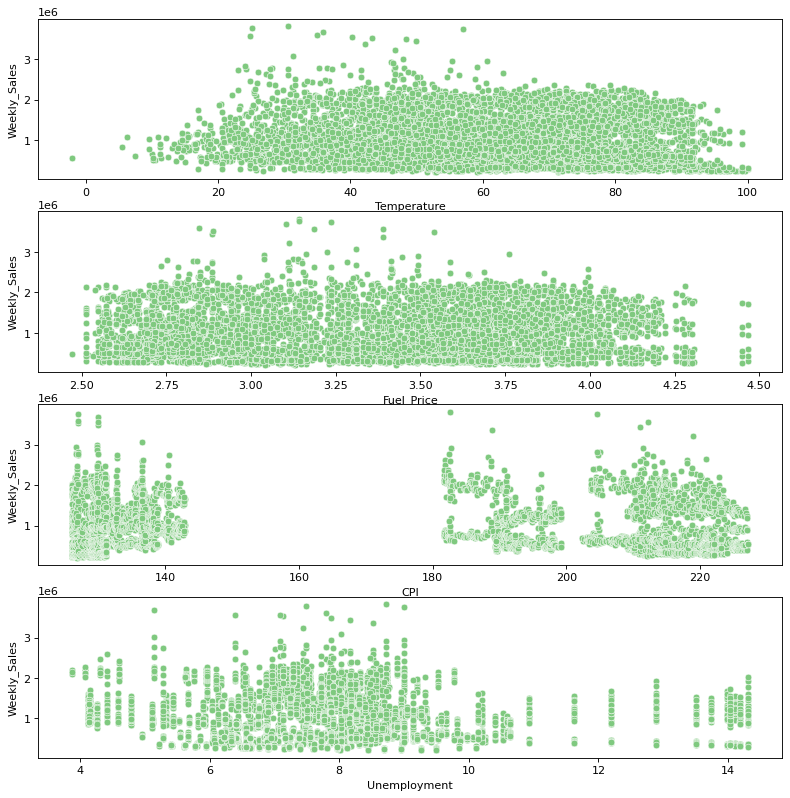

In [214]:
fig, axis = plt.subplots(4, figsize=(12,12), dpi=80)
x = sales[['Temperature','Fuel_Price','CPI','Unemployment']]

for i, column in enumerate(x):
    sns.scatterplot(x=sales[column], y= sales['Weekly_Sales'], ax=axis[i])

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

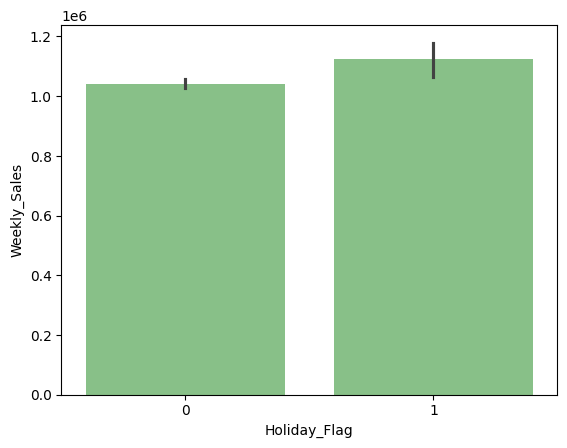

In [215]:
sns.barplot(y=sales['Weekly_Sales'], x=sales['Holiday_Flag'])

## Data cleaning

In [153]:
sales.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
monthdate       0
yeardate        0
dtype: int64

In [155]:
sales.drop_duplicates(inplace=True)